In [6]:
import pandas as pd
import numpy as np

# 数据加载
train = pd.read_csv('./train.csv')
print(train.head())

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2


In [7]:
# 转换为pandas中的日期格式
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
# 将Datetime作为train的索引
train.index = train.Datetime
# 去掉ID, Datetime
train.drop(['ID', 'Datetime'], axis=1, inplace=True)

# 按天进行采样
daily_train = train.resample('D').sum()
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'], axis=1, inplace=True)
print(daily_train)

                   ds      y
Datetime                    
2012-08-25 2012-08-25     76
2012-08-26 2012-08-26     88
2012-08-27 2012-08-27     62
2012-08-28 2012-08-28     58
2012-08-29 2012-08-29     60
...               ...    ...
2014-09-21 2014-09-21   9102
2014-09-22 2014-09-22  14116
2014-09-23 2014-09-23  13304
2014-09-24 2014-09-24  16856
2014-09-25 2014-09-25  14152

[762 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds
970 2015-04-22
971 2015-04-23
972 2015-04-24
973 2015-04-25
974 2015-04-26


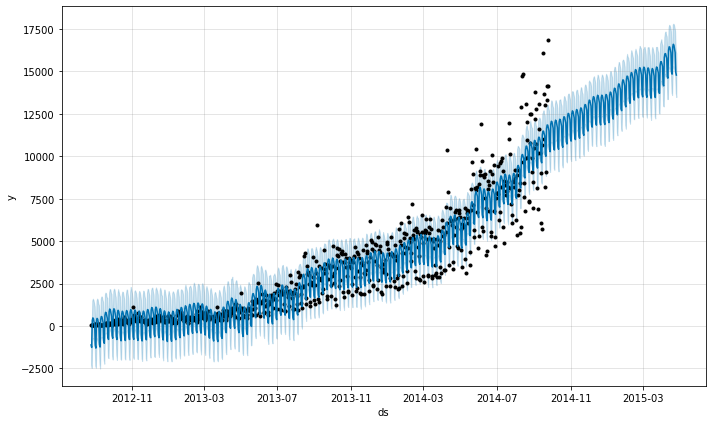

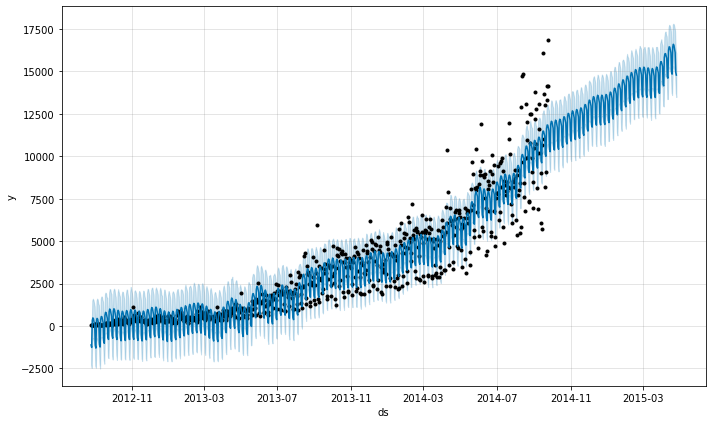

In [10]:
from fbprophet import Prophet
# 拟合prophet模型
m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
# 使用fit完成拟合
m.fit(daily_train)
# 预测未来7个月，213天
future = m.make_future_dataframe(periods=213)
print(future.tail())
# 预测未来，prophet考虑了 周、月，还有holidays
forecast = m.predict(future)
m.plot(forecast)

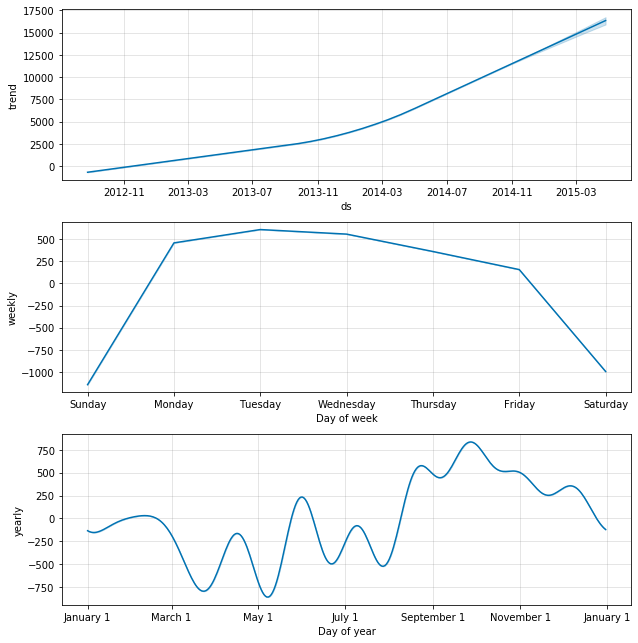

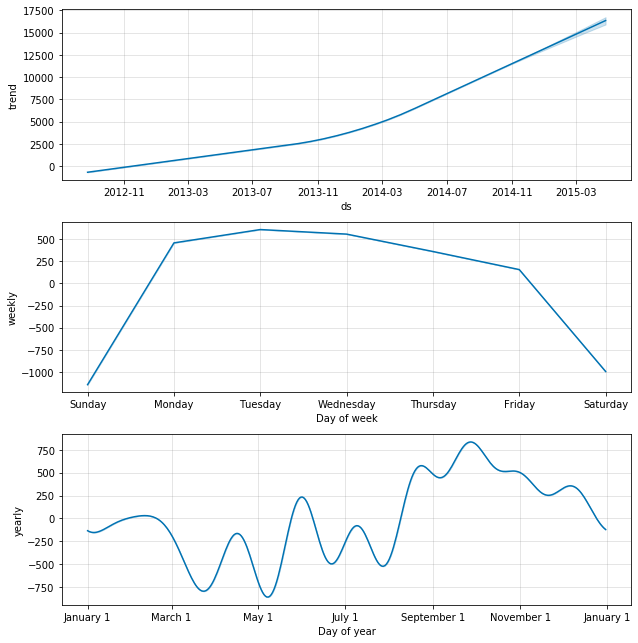

In [9]:
# 成分分析
m.plot_components(forecast)